In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
import random
from scipy.signal import find_peaks
import random
from model import ELM

import pandas as pd
import numpy as np


In [55]:
X = np.genfromtxt('C:/Users/alamg/Documents/MATLAB/Thesis/X_v3.csv', delimiter=',')
Y = np.genfromtxt('C:/Users/alamg/Documents/MATLAB/Thesis/Targets_v3.csv', delimiter=',')
w1= np.arange(0,3848,1)
w2=np.arange(0,101,1)
w3=np.linspace(400,700,101)
y= Y[:,0]
dP1 = []
dP2 = []
dP3 = []
dA1 = []
dA2 = []
dA3 = []
pos1 = []
pos2 = []
pos3 = []
x_2p_data= pd.DataFrame()
y_2p_raw= pd.DataFrame()

In [57]:
for i in w1:
    peaks, _ = find_peaks(Y[i,:],height=0.4)
    if len(peaks)==1:
      dP1.append(peaks)
      dA1.append(Y[i,(peaks[0])])
      pos1.append(i)  
    if len(peaks)==2:
        dP2.append(peaks)
        dA2.append(Y[i,(peaks[0],peaks[1])])
        pos2.append(i) 
    if len(peaks)==3:
        dP3.append(peaks)
        dA3.append(Y[i,(peaks[0],peaks[1],peaks[2])])
        pos3.append(i)

In [116]:
#getting full waveform for 2 peaks responses
y_2p_data = []
for i in range(0,len(pos2)):
    j = pos2[i]
    y_2p_data.append(Y[j,:])

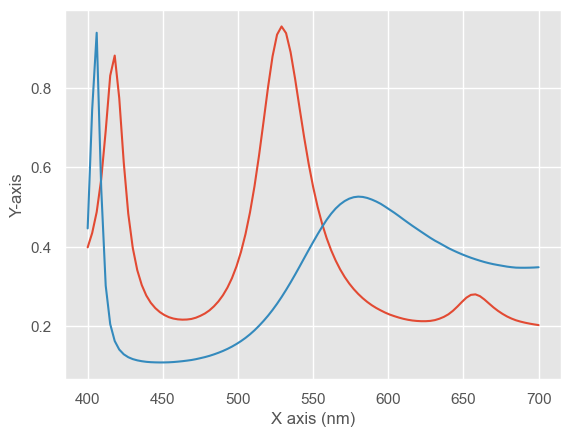

In [126]:
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    plt.plot(w3,Y[1,:])
    plt.plot(w3,y_2p_data[0])
    plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    plt.show()

In [127]:

#getting data for each peak response by taking X as different pos values for each 1,2,3 peak response
for i in range(0,len(pos2)):
    j = pos2[i]
    k = pd.DataFrame({"P1":X[j,0],"H1":X[j,1],"H2":X[j,2],"H3":X[j,3],"W1":X[j,4]},index=[i])
    x_2p_data = pd.concat([x_2p_data, pd.DataFrame(k)], ignore_index=True)


In [128]:
# Network Settings
num_classes = 10
num_hidden_layers = 512
input_length = 2087*5

In [133]:
x_train= x_2p_data.values.astype('float32')
labels = [dP2,dA2]

# Process images into input vectors
# each mnist image is a 28x28 picture with value ranges between 0 and 255

# converts [1,2] into [[0,1,0], [0,0,1]]
y_train = to_categorical(y_train, num_classes).astype(np.float32)
y_test = to_categorical(y_test, num_classes).astype(np.float32)

IndexError: index 60 is out of bounds for axis 1 with size 10